In [69]:
from diagrams import Diagram, Cluster, Edge
from diagrams.aws.storage import S3
from diagrams.custom import Custom
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.container import Docker

# Start a new diagram
with Diagram("Web Scraping Pipeline", show=True) as diag:
    
    # Define Airflow Orchestration cluster encompassing all components
    with Cluster("Airflow Orchestration"):
        # Docker container icon to represent the environment
        docker = Docker("Docker Container")
        
        # Airflow icon for orchestration
        airflow_icon = Airflow("Airflow")
        
        # Web Scraping components inside Docker
        selenium = Custom("Selenium - CFAI Scraping", "input_icons/CFAI.png")  # CFAI icon for Selenium
        beautiful_soup = Custom("BeautifulSoup - Parsing", "input_icons/bs.png")  # BeautifulSoup logo
        scraping = selenium >> beautiful_soup  # Edge to indicate flow between Selenium and BeautifulSoup

        # Data Processing component
        python = Custom("Python Processing", "input_icons/python.png")  # Python logo for processing

        # Define S3 for file storage
        s3_storage = S3("AWS S3 Bucket - Images & PDFs")

        # Define Snowflake for metadata storage
        snowflake = Custom("Snowflake Database - Metadata Table", "input_icons/snowflake.png")  # Snowflake logo

        # Define data flow within Airflow Orchestration
        scraping >> Edge(label="Scrape CFAI Data") >> python  # CFAI data scraped by Selenium, parsed by BeautifulSoup
        python >> Edge(label="Store Files") >> s3_storage  # Files (images & PDFs) are stored in S3
        python >> Edge(label="Load Metadata") >> snowflake  # Metadata is loaded into Snowflake


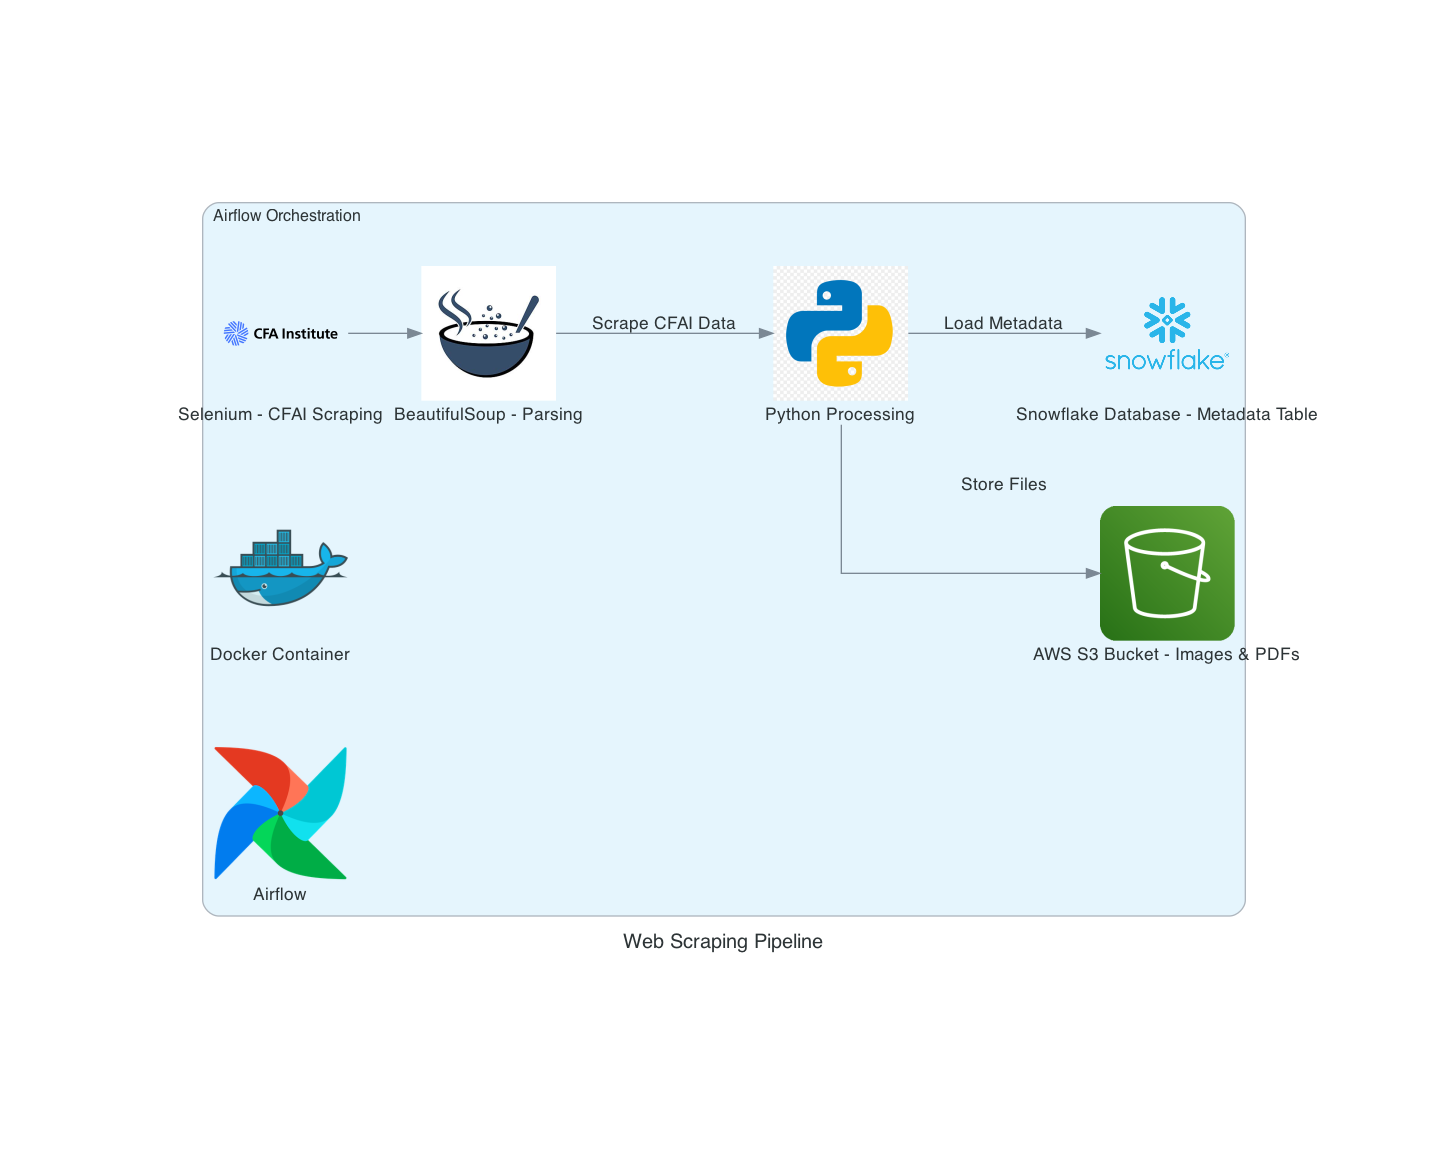

In [44]:
diag

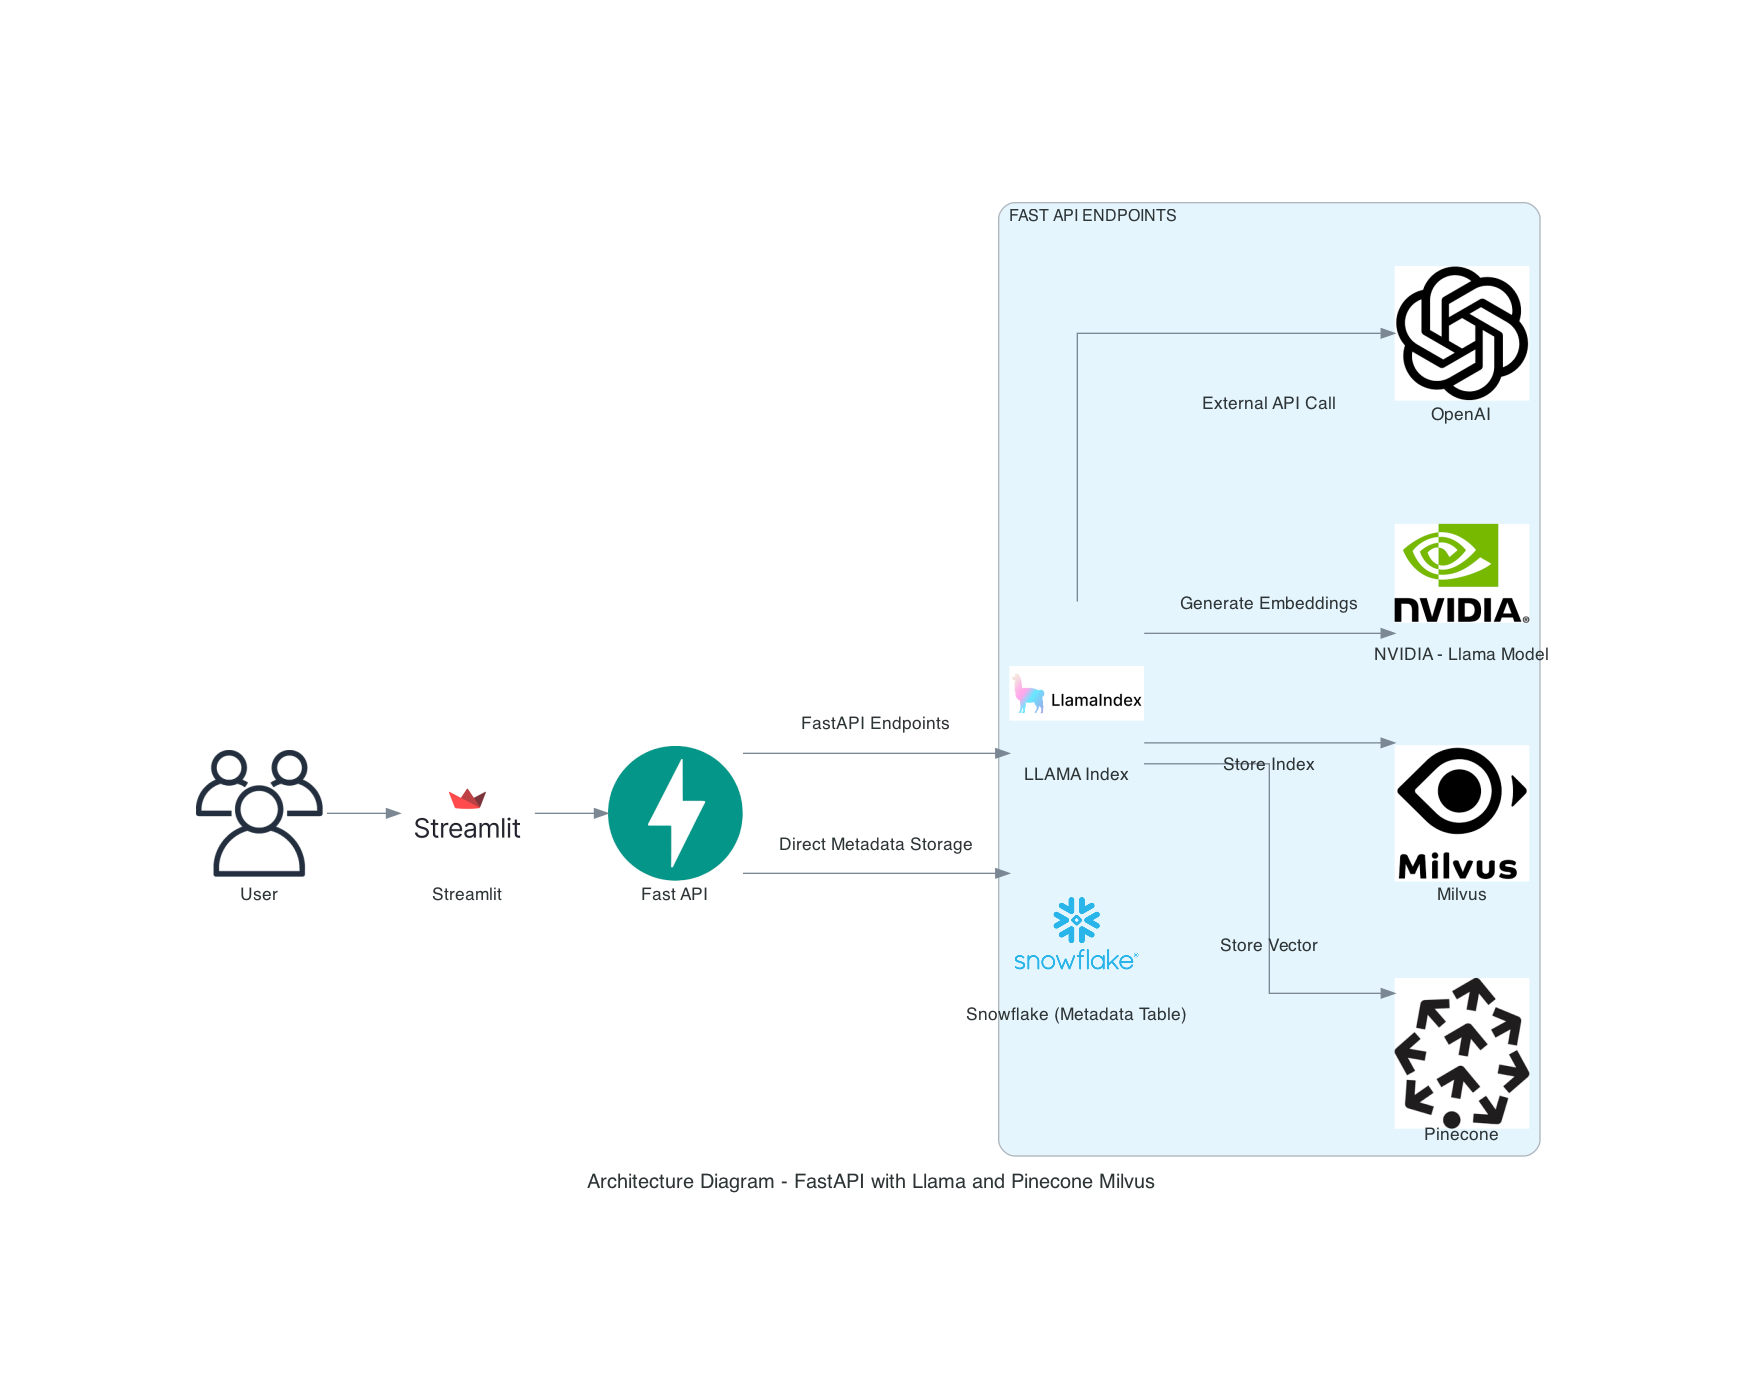

In [90]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.onprem.client import Users
from diagrams.aws.storage import S3

# Start a new diagram
with Diagram("Architecture Diagram - FastAPI with Llama and Pinecone Milvus", show=True) as diag1:
    # Define the user interface
    user = Users("User")
    streamlit = Custom("Streamlit", "input_icons/streamlit.png")

    # Define FastAPI and the cluster of endpoints
    fastapi = Custom("Fast API", "input_icons/fastapi.png")
    
    # Define the endpoints cluster
    with Cluster("FAST API ENDPOINTS"):
        llama_index = Custom("LLAMA Index", "input_icons/llamaindex.png")
        pinecone = Custom("Pinecone", "input_icons/pinecone.png")
        milvus = Custom("Milvus", "input_icons/milvus.png")
        nvidia_llama = Custom("NVIDIA - Llama Model", "input_icons/nvidia.png")
        snowflake = Custom("Snowflake (Metadata Table)", "input_icons/snowflake.png")
        openai = Custom("OpenAI", "input_icons/openai.png")  # Use a custom OpenAI logo here

    # Set up edges and flow
    user >> streamlit >> fastapi >> Edge(label="FastAPI Endpoints") >> llama_index

    # Connect FastAPI directly to Snowflake
    fastapi >> Edge(label="Direct Metadata Storage") >> snowflake

    # Define interactions within the endpoints cluster
    llama_index >> Edge(label="Store Vector") >> pinecone
    llama_index >> Edge(label="Store Index") >> milvus
    llama_index >> Edge(label="Generate Embeddings") >> nvidia_llama
    llama_index >> Edge(label="External API Call") >> openai


diag1